# CMSE 491 Final Project 


### &#9989; Daniel Weatherspoon
#### &#9989; December 1st

## INSTRUCTIONS FOR RUNNING THE NOTEBOOK

 The dataset used in this project is freely available at https://archive.ics.uci.edu/dataset/186/wine+quality, The name of the file to download is `wine+quality.zip` and must be found by clicking a button on the top right corner. The file should be downloaded in the same folder as this notebook and you will need to extract the dataset which is titled: `winequality-red.csv`. There are other files in there but have no use for this project.



# Wine Quality Prediction

## Background and Motivation
Recently, in the past few years, there's been an increased demand for high quality red wines. Consumers are being influenced by the more wealthy people such as social media influencers to be drinking higher quality wine. Making a high quality wine is complex because of the factors and also the taste preferences people have. 

Predicting the quality of red wines is an interest shared by many people, such as winemakers, consumers, and distributors. Whoever gets the upper hand in this has more control of the market and makes for more competitiveness at wineries. 

This project hopes to use machine learning techniques to predict the quality of wines the best and see which factors have the most influence on the quality.

## Goal
- Create machine learning model capable of accurately predicting the quality of red wines based on features/chemical properties. Which model would be most accurate?

- Identify which features/properties are most important when it comes to the quality of red wines. What features are most important?

- Make interpretable models that are easy to understand by winemakers and industry professionals. How can someone not familiar with python know what these plots mean?

## Exploratory Data Analysis

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import time 

In [196]:
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [149]:
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

goodwines = df[df['quality'].isin([6,7,8])]
goodwines.head()
goodwines['quality'].value_counts()

quality
6    638
7    199
8     18
Name: count, dtype: int64

In [150]:
# checking for any null values
print(df.isnull().sum())
print('=============================================')
print(df['quality'].value_counts())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [151]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [153]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [154]:
#correlations with quality 
correlation=df.corr()
correlation['quality'].sort_values(ascending=False).drop(['quality'])

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

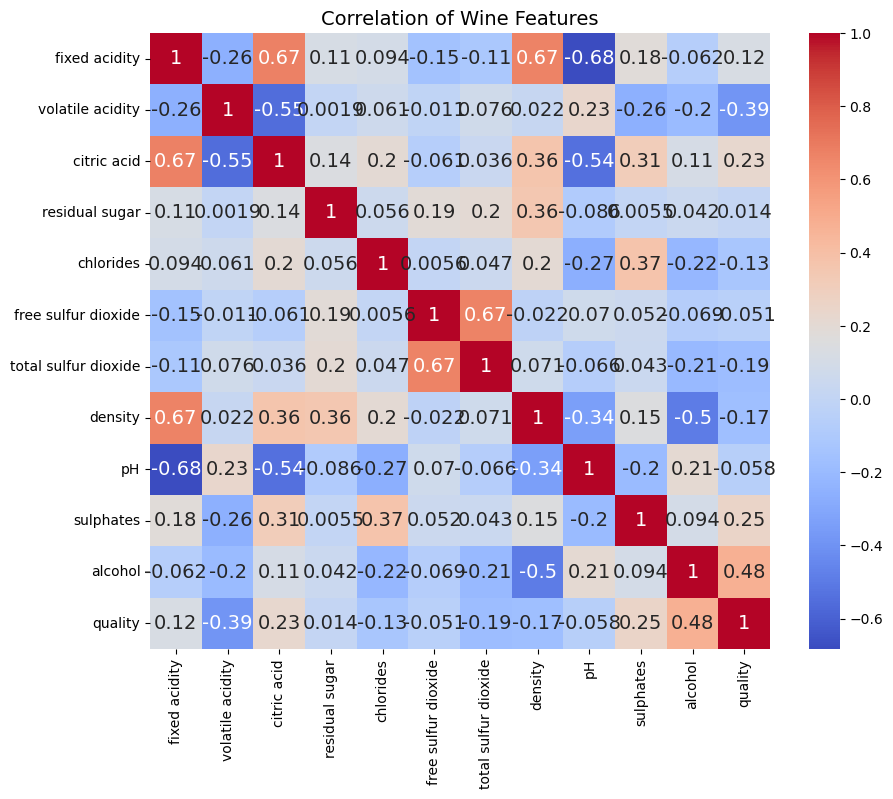

In [155]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation of Wine Features')
plt.show()

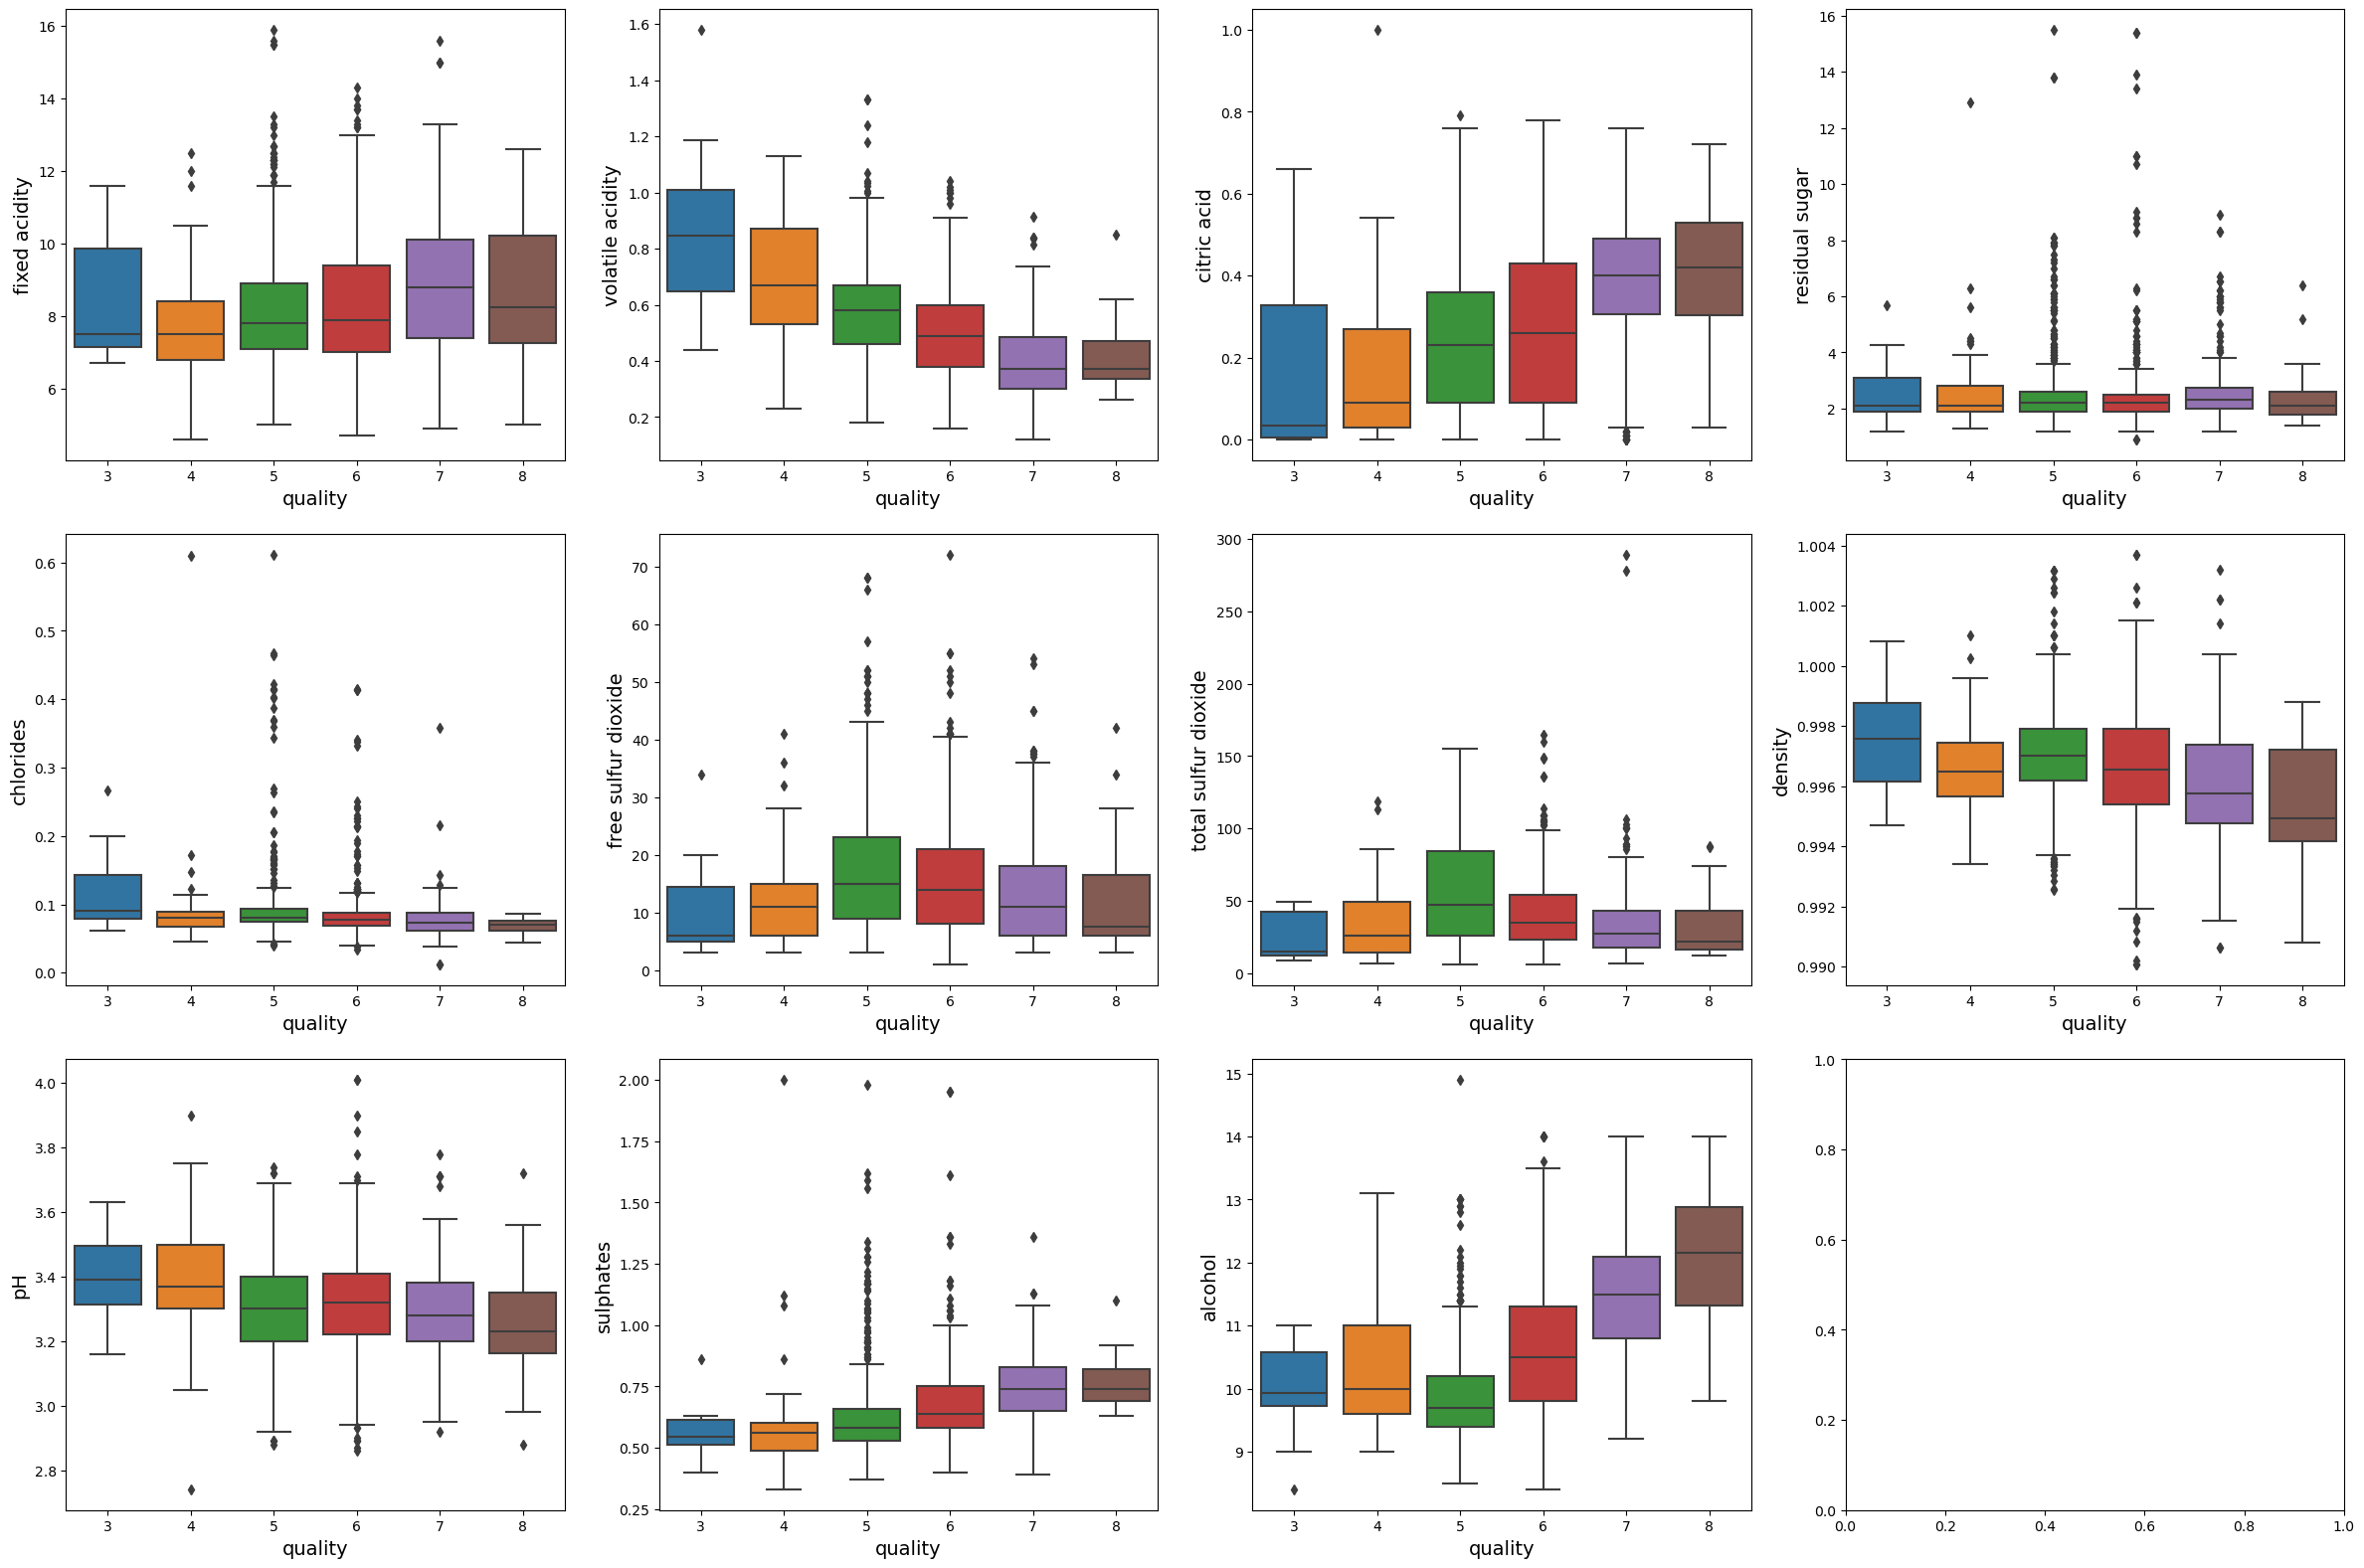

In [156]:
#Subplot boxplots to show outliers of all variables with respect to quality (EDA)
fig, axes = plt.subplots(3, 4, figsize=(24, 16)) 
axes = axes.flatten()
for i in range(0, len(X.columns)):
    sns.boxplot(x='quality', y=X.iloc[:, i], data=df, ax=axes[i])
plt.tight_layout()
plt.show()


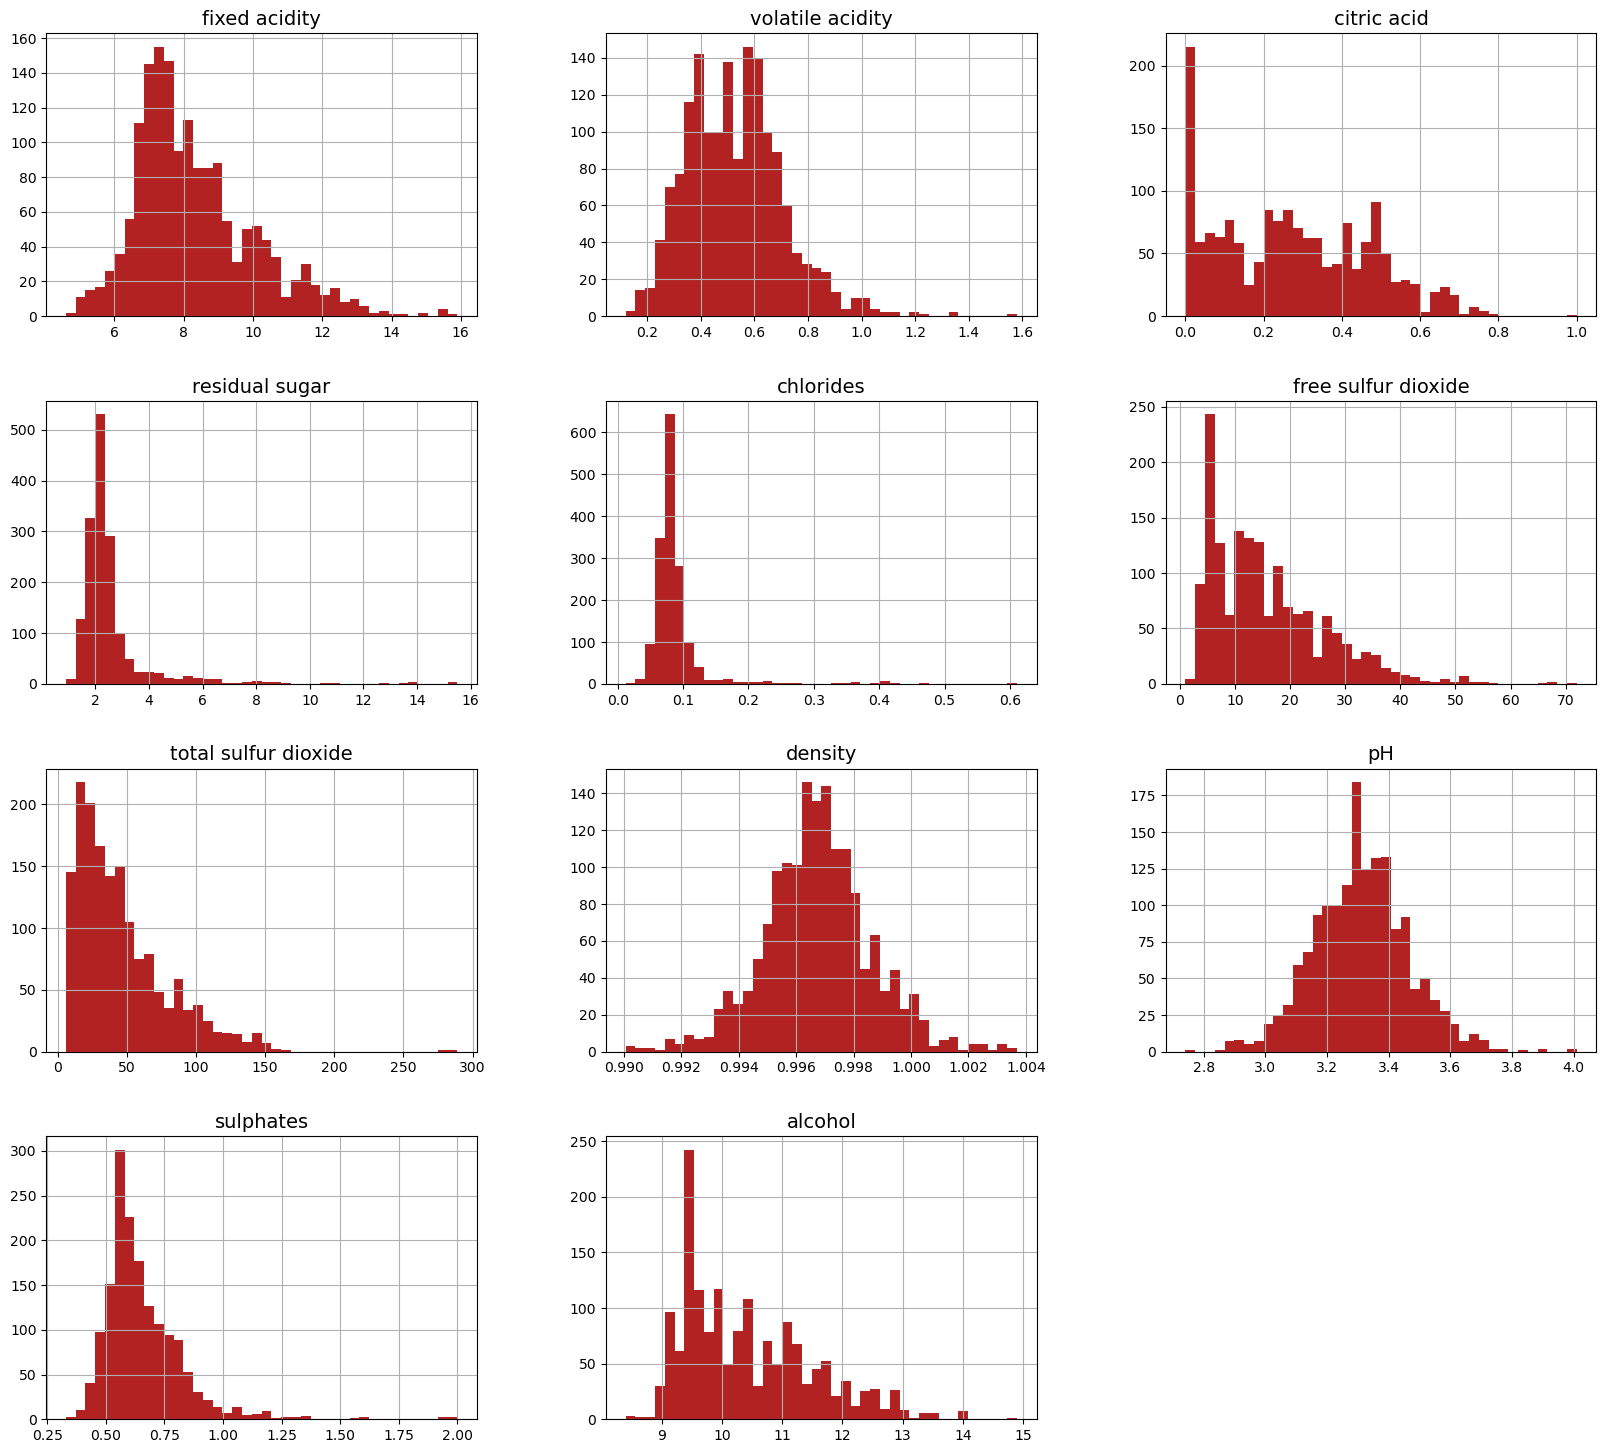

In [157]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X.hist(bins = 40,figsize=(20, 18), color = 'firebrick')
plt.show()

## Methodology

_(How did you go about answering your question(s)? Most of your code will be contained in this section. Here is where you can subdivide with Hyperparameter tuning, cross-validation, feature engineering, baseline.)_


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

def print_scores_of_validation(scores):
    print("Scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

my_pipeline=Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

X_train = my_pipeline.fit_transform(X_train)
X_test = my_pipeline.transform(X_test)


(1199, 11)
(400, 11)
(1199,)
(400,)


### Linear Regression

In [159]:
# Baseline Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, y_train)
lin_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)

scores = cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

#Linear Regression RMSE score

#plotting x and y 
#plt.scatter(y_test, lin_pred, color = 'firebrick')
#plt.xlabel('Actual Quality')
#plt.ylabel('Predicted Quality')
rmse_test = metrics.mean_squared_error(lin_pred, y_test) ** 0.5
print(rmse_test,':RMSE test set score')
rmse_train = metrics.mean_squared_error(train_pred, y_train) ** 0.5
print(rmse_train,':RMSE train set score') 
print('=============================================')
print_scores_of_validation(rmse_scores)

0.6656933408143431 :RMSE test set score
0.6398956524969308 :RMSE train set score
Scores: [0.58226581 0.66310767 0.60785722 0.63332063 0.70170322 0.69127142
 0.60668315 0.64967452 0.60092727 0.71876786]
mean: 0.6455578765599558
standard deviation: 0.04472894125922074


In [160]:
#Check for Feature Importance for Linear Regression
feature_importances = grid_search_reg.best_estimator_.coef_
attributes = list(X.columns)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30779091501478134, 'alcohol'),
 (0.15684423454352087, 'sulphates'),
 (0.05774572075860466, 'fixed acidity'),
 (0.04952047653781156, 'free sulfur dioxide'),
 (0.02930086113295448, 'residual sugar'),
 (-0.040734446193434415, 'density'),
 (-0.047392549964454786, 'pH'),
 (-0.05020167013490136, 'citric acid'),
 (-0.0941611822393666, 'total sulfur dioxide'),
 (-0.09603709451607859, 'chlorides'),
 (-0.20641995989663914, 'volatile acidity')]

##### Better Parameters for Linear Regression

In [161]:
param_grid_reg = [
    {'fit_intercept': [True, False], 'copy_X': [True, False], 'positive': [True, False], 'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
]

grid_search_reg = GridSearchCV(reg, param_grid_reg, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_reg.fit(X_train, y_train)
print(grid_search_reg.best_params_, 'best params')
print('=============================================')
print(grid_search_reg.best_estimator_, 'best estimator')
print('=============================================')
print(grid_search_reg.best_score_, 'best score')
print('=============================================')
print(grid_search_reg.cv_results_, 'cv results')
print('=============================================')
grid_search_reg_pred = grid_search_reg.predict(X_test)
grid_search_reg_rmse = np.sqrt(metrics.mean_squared_error(grid_search_reg_pred, y_test))
print(grid_search_reg_rmse, 'Best Linear Regression RMSE')
print('No change in RMSE score with better parameters.')

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False} best params
LinearRegression() best estimator
-0.41954792795259455 best score
{'mean_fit_time': array([0.00169196, 0.00138116, 0.00125341, 0.00123501, 0.00142789,
       0.00146894, 0.00137339, 0.0026557 , 0.00139942, 0.00108266,
       0.00094466, 0.00091801, 0.00101132, 0.00095339, 0.00091529,
       0.00087357, 0.00091009, 0.00093884, 0.00086427, 0.0010632 ,
       0.00086231, 0.00085034, 0.00078621, 0.00075774, 0.00089908,
       0.00084515, 0.00073552, 0.00093513, 0.00077715, 0.00082455,
       0.00095148, 0.00086274, 0.00087881, 0.00100789, 0.00075006,
       0.00092983, 0.00092335, 0.00154486, 0.00131874, 0.00216365,
       0.00156021, 0.00261517, 0.00146642, 0.001439  , 0.00192304,
       0.00292201, 0.001858  , 0.00116258, 0.00126367, 0.00098748,
       0.00101309, 0.00095954, 0.0009551 , 0.00086741, 0.00090327,
       0.00087223, 0.00081677, 0.00089445, 0.00088577, 0.0008461 ,
       0.00085058, 0.0008

In [162]:
#Linear Regression with Lasso Regularization
lasso_reg = LassoCV(cv=5, random_state=123)
lasso_reg.fit(X_train, y_train)
lasso_reg_pred = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(metrics.mean_squared_error(lasso_reg_pred, y_test))
print(lasso_reg_rmse, 'Lasso Regression RMSE')
print('=============================================')
print(lasso_reg.alpha_, 'Lasso Regression Alpha')
print('=============================================')
print(lasso_reg.coef_, 'Lasso Regression Coefficients')
print('=============================================')
print(lasso_reg.intercept_, 'Lasso Regression Intercept')


0.665337821402656 Lasso Regression RMSE
0.0012089017710060594 Lasso Regression Alpha
[ 0.04692995 -0.20473531 -0.04383869  0.02493415 -0.0952765   0.0471702
 -0.09204938 -0.03179492 -0.04866317  0.15378403  0.31088478] Lasso Regression Coefficients
5.633027522935782 Lasso Regression Intercept


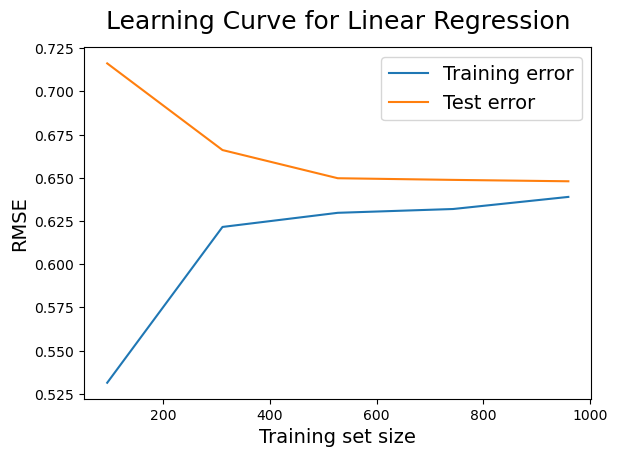

In [201]:
#Learning Curve for Linear Regression
train_sizes, train_scores, test_scores = learning_curve(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error', random_state=123)
train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
test_scores_mean = np.sqrt(-test_scores.mean(axis=1))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning Curve for Linear Regression', fontsize=18, y=1.03)
plt.legend()
#plt.ylim(0, 1)
save_fig('learning_curves_LR')

### Decision Tree Regression

In [164]:
# Baseline Decision Tree Model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_test_pred = tree.predict(X_test)
train_pred_tree = tree.predict(X_train)
tree_scores = cross_val_score(tree, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse = metrics.mean_squared_error(tree_test_pred, y_test) ** 0.5
print_scores_of_validation(tree_rmse_scores)
print(tree_rmse,':Base Decision Tree RMSE Score')

Scores: [0.71879529 0.74161985 0.63900965 0.77459667 0.77459667 0.73029674
 0.81137743 0.82158384 0.71297499 0.85993942]
mean: 0.7584790538651094
standard deviation: 0.0604905338034089
0.8154753215150046 :Base Decision Tree RMSE Score


In [165]:
#Check for Feature Importance for Decision Tree
feature_importances = grid_search_tree.best_estimator_.feature_importances_
attributes = list(X.columns)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3180353910255724, 'alcohol'),
 (0.16636543676080162, 'citric acid'),
 (0.16141495685400015, 'sulphates'),
 (0.1003528207478589, 'volatile acidity'),
 (0.09253748553237016, 'density'),
 (0.0368637999785243, 'fixed acidity'),
 (0.03572101842596059, 'free sulfur dioxide'),
 (0.029067591658813716, 'total sulfur dioxide'),
 (0.022281319709206677, 'chlorides'),
 (0.02150111551559086, 'pH'),
 (0.01585906379130057, 'residual sugar')]

#### Better Parameters for Decision Tree Regressor

In [166]:
param_grid_tree = [
    {'max_depth': [2, 4, 6, 8, 10, 12, 14], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
     'criterion': ['absolute_error', 'squared_error', 'poisson',], 'max_features': ['sqrt', 'log2']}
]

grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_tree.fit(X_train, y_train)
print(grid_search_tree.best_params_, 'best params')
print('=============================================')
print(grid_search_tree.best_estimator_, 'best estimator')
print('=============================================')
print(grid_search_tree.best_score_, 'best score')
print('=============================================')
#print(grid_search_tree.cv_results_, 'cv results')
#print('=============================================')
grid_search_tree_pred = grid_search_tree.predict(X_test)
grid_search_tree_rmse = np.sqrt(metrics.mean_squared_error(grid_search_tree_pred, y_test))
print(grid_search_tree_rmse, 'Best Decision Tree RMSE')
print('Decision Tree RMSE score improved with better parameters.')


{'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'min_samples_split': 8} best params
DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=14,
                      min_samples_split=8) best estimator
-0.4403773214559038 best score
0.6956035847992148 Best Decision Tree RMSE
Decision Tree RMSE score improved with better parameters.


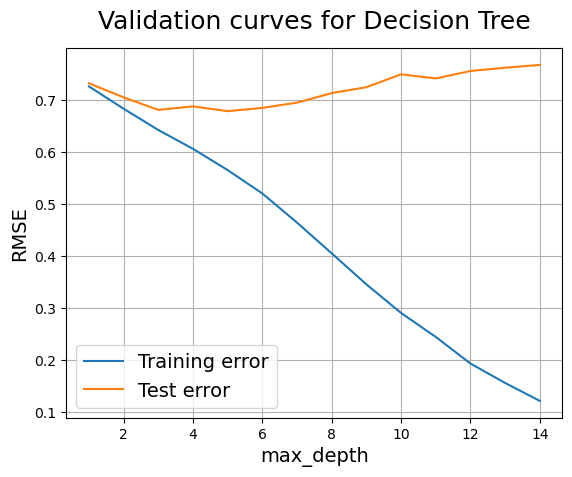

In [167]:
#Validation Curve for Decision Tree using training score and cross-validation score
param_range = np.arange(1, 15, 1)
train_scores, test_scores = validation_curve(tree, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5, scoring="neg_mean_squared_error")
train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
test_scores_mean = np.sqrt(-test_scores.mean(axis=1))
plt.plot(param_range, train_scores_mean, label='Training error')
plt.plot(param_range, test_scores_mean, label='Test error')
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('max_depth', fontsize=14)
plt.title('Validation curves for Decision Tree', fontsize=18, y=1.03)
plt.legend()
plt.grid()
#plt.ylim(0, 1)


### Random Forest Regression

In [168]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
forest_scores = cross_val_score(forest, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse = metrics.mean_squared_error(forest_pred, y_test) ** 0.5
print_scores_of_validation(forest_rmse_scores)
print(forest_rmse, ':Random Forest RMSE score.')

Scores: [0.49399899 0.57542521 0.54144406 0.57728604 0.60865015 0.59656307
 0.58925942 0.52805697 0.52784467 0.64656559]
mean: 0.5685094160615961
standard deviation: 0.04315186050437768
0.5992891622580871 :Random Forest RMSE score.


In [169]:
#Check for Feature Importance for Random Forest
feature_importances = grid_search_forest.best_estimator_.feature_importances_
attributes = list(X.columns)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.38564868413290454, 'alcohol'),
 (0.18478542416207097, 'volatile acidity'),
 (0.16702163349198404, 'sulphates'),
 (0.05030233369970039, 'density'),
 (0.04421519247464359, 'fixed acidity'),
 (0.039569597250522615, 'pH'),
 (0.03307445764859348, 'total sulfur dioxide'),
 (0.032723545303457946, 'chlorides'),
 (0.02584330549584574, 'citric acid'),
 (0.019868248212256762, 'residual sugar'),
 (0.016947578128019978, 'free sulfur dioxide')]

#### Better Parameters for Random Forest Regressor

In [170]:
param_grid_forest = [
    {'n_estimators': [1, 2, 4, 6], 'max_features': [2, 4, 6], 'criterion': ['absolute_error', 'squared_error', 'poisson'], 'max_depth': [2, 4, 6],
     'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}
]

grid_search_forest = GridSearchCV(forest, param_grid_forest, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_forest.fit(X_train, y_train)
print(grid_search_forest.best_params_, 'best params')
print('=============================================')
print(grid_search_forest.best_estimator_, 'best estimator')
print('=============================================')
print(grid_search_forest.best_score_, 'best score')
print('=============================================')
#print(grid_search_forest.cv_results_, 'cv results')
#print('=============================================')
grid_search_forest_pred = grid_search_forest.predict(X_test)
grid_search_forest_rmse = np.sqrt(metrics.mean_squared_error(grid_search_forest_pred, y_test))
print(grid_search_forest_rmse, 'Best Random Forest RMSE')
print('Random Forest RMSE score improve with better parameters.')

{'criterion': 'squared_error', 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 6} best params
RandomForestRegressor(max_depth=6, max_features=6, min_samples_leaf=2,
                      n_estimators=6) best estimator
-0.3932079629069586 best score
0.6309183895023833 Best Random Forest RMSE
Random Forest RMSE score improve with better parameters.


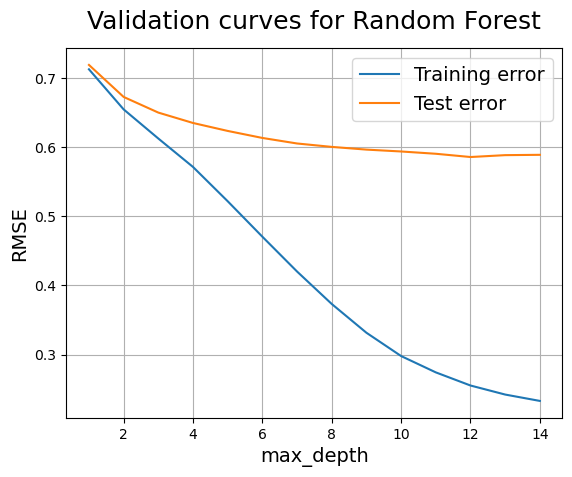

In [171]:
#Validation Curve for Random Forest using training score and cross-validation score
param_range = np.arange(1, 15, 1)
train_scores, test_scores = validation_curve(forest, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5, scoring="neg_mean_squared_error")
train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
test_scores_mean = np.sqrt(-test_scores.mean(axis=1))
plt.plot(param_range, train_scores_mean, label='Training error')
plt.plot(param_range, test_scores_mean, label='Test error')
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('max_depth', fontsize=14)
plt.title('Validation curves for Random Forest', fontsize=18, y=1.03)
plt.legend()
plt.grid()
#plt.ylim(0, 1)


### Feature Importance

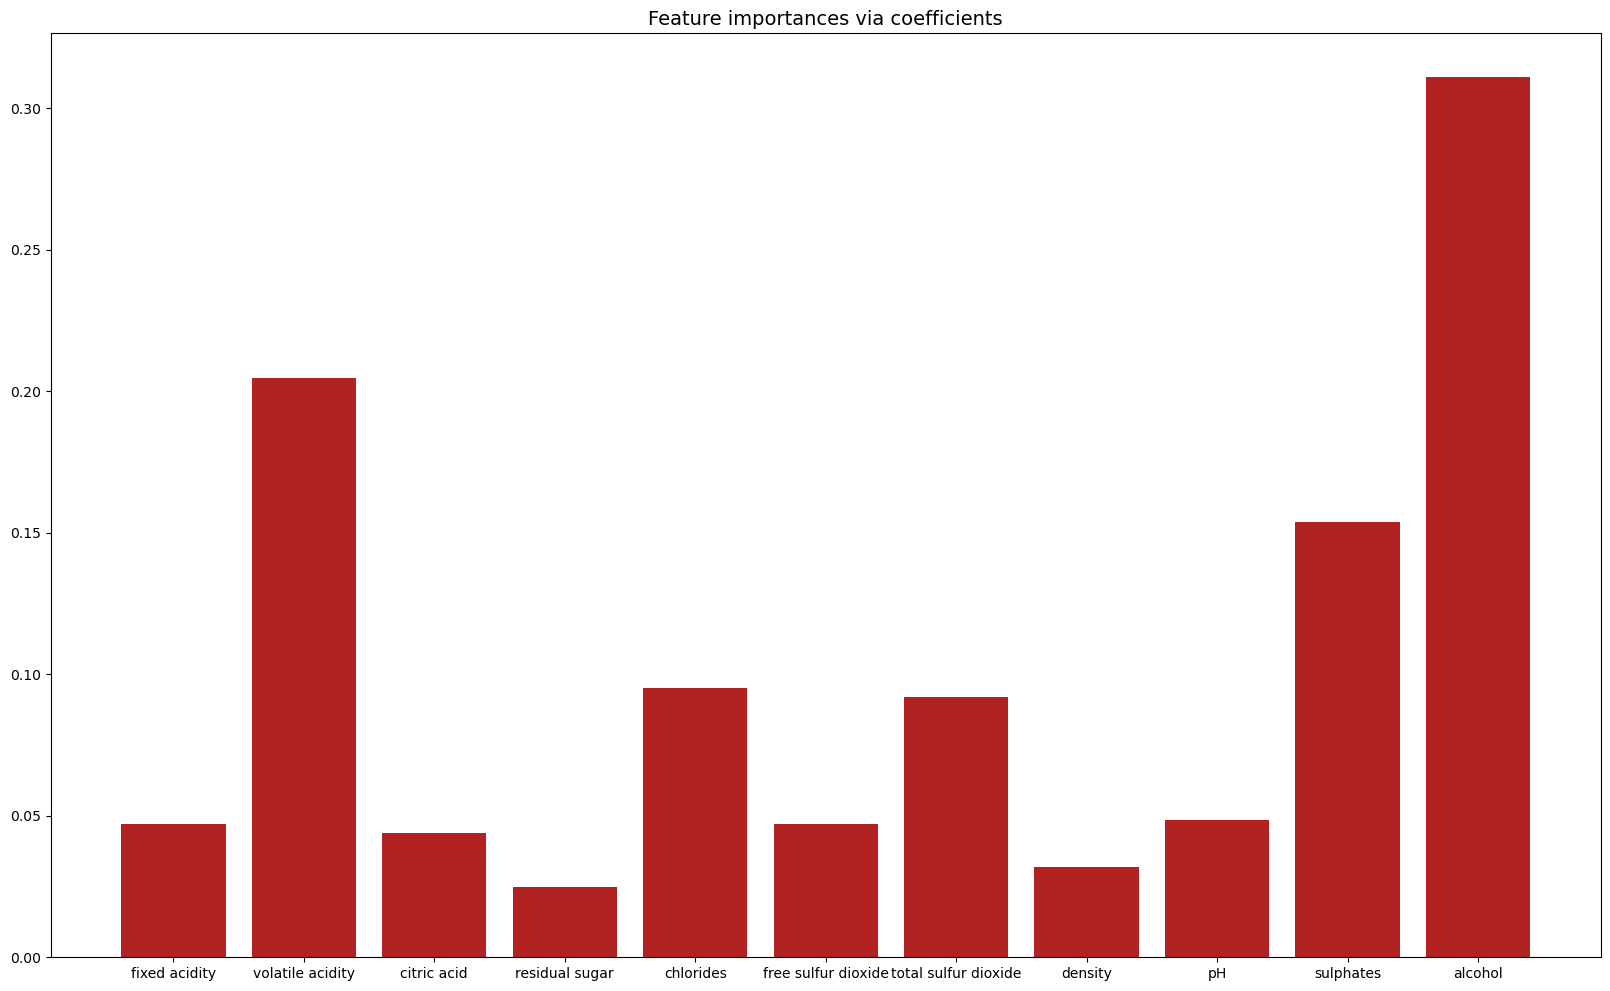

In [172]:
#Feature Importance with Lasso Regularization
lasso = LassoCV().fit(X_train, y_train)
importance = np.abs(lasso.coef_)
feature_names = np.array(X.columns)
plt.figure(figsize=(20, 12))
plt.bar(height=importance, x=feature_names, color = 'firebrick')
plt.title("Feature importances via coefficients")
plt.show()


In [173]:
sfm = SelectFromModel(lasso, threshold=0.1)
sfm.fit(X_train, y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(feature_names[feature_list_index])
#most important features are volatile acidity, chlorides, total sulfur dioxide, density, and alcohol

volatile acidity
sulphates
alcohol


## Results

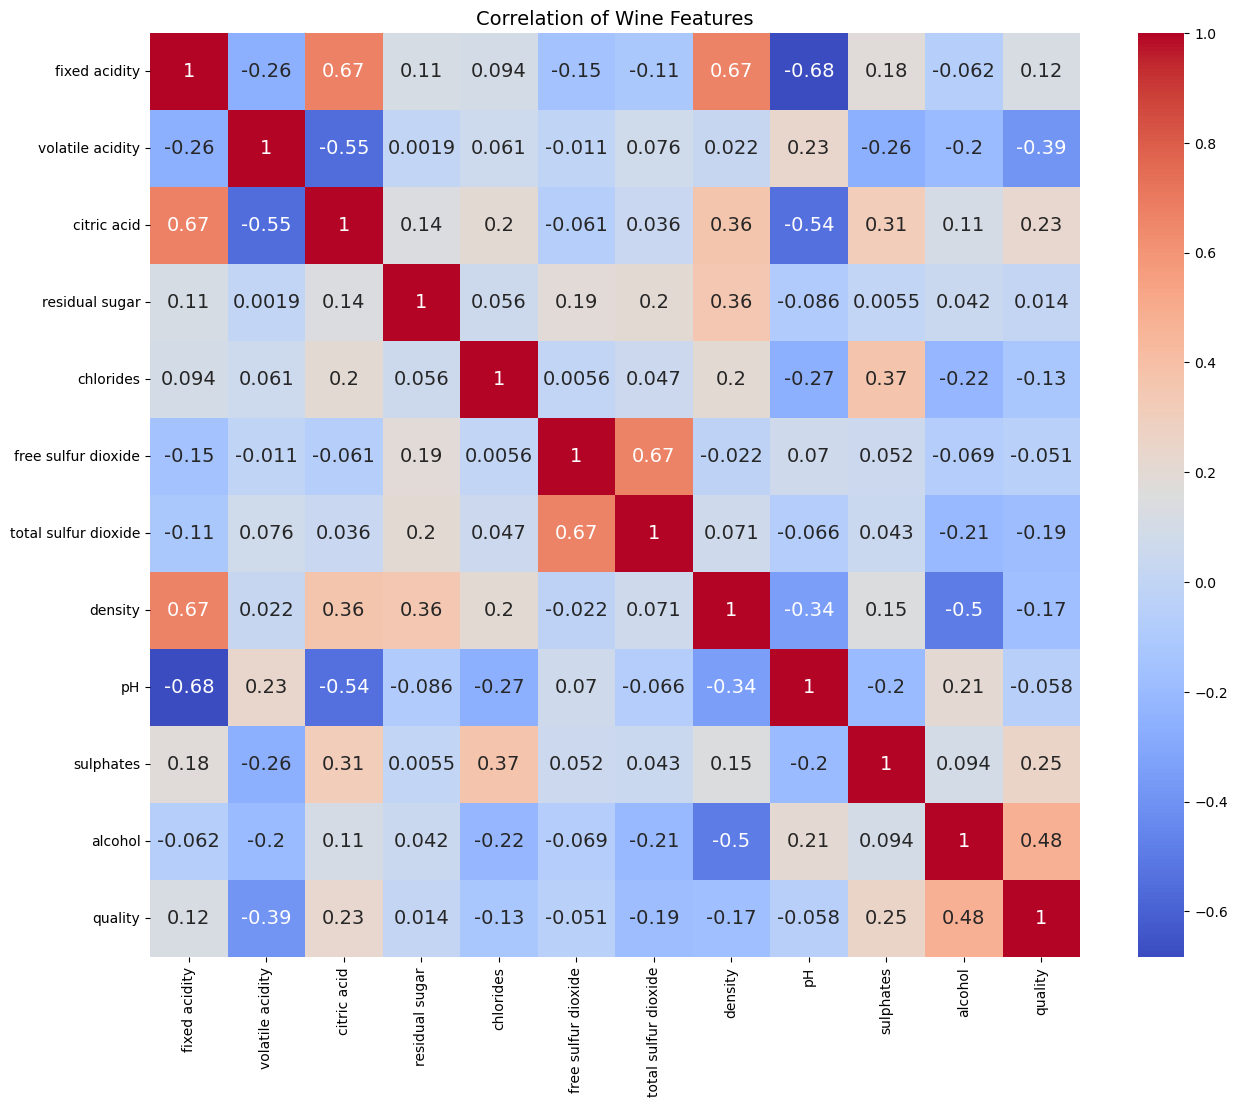

In [197]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation of Wine Features')
save_fig("correlation_heatmap", tight_layout=False, fig_extension="png", resolution=300)
plt.show()

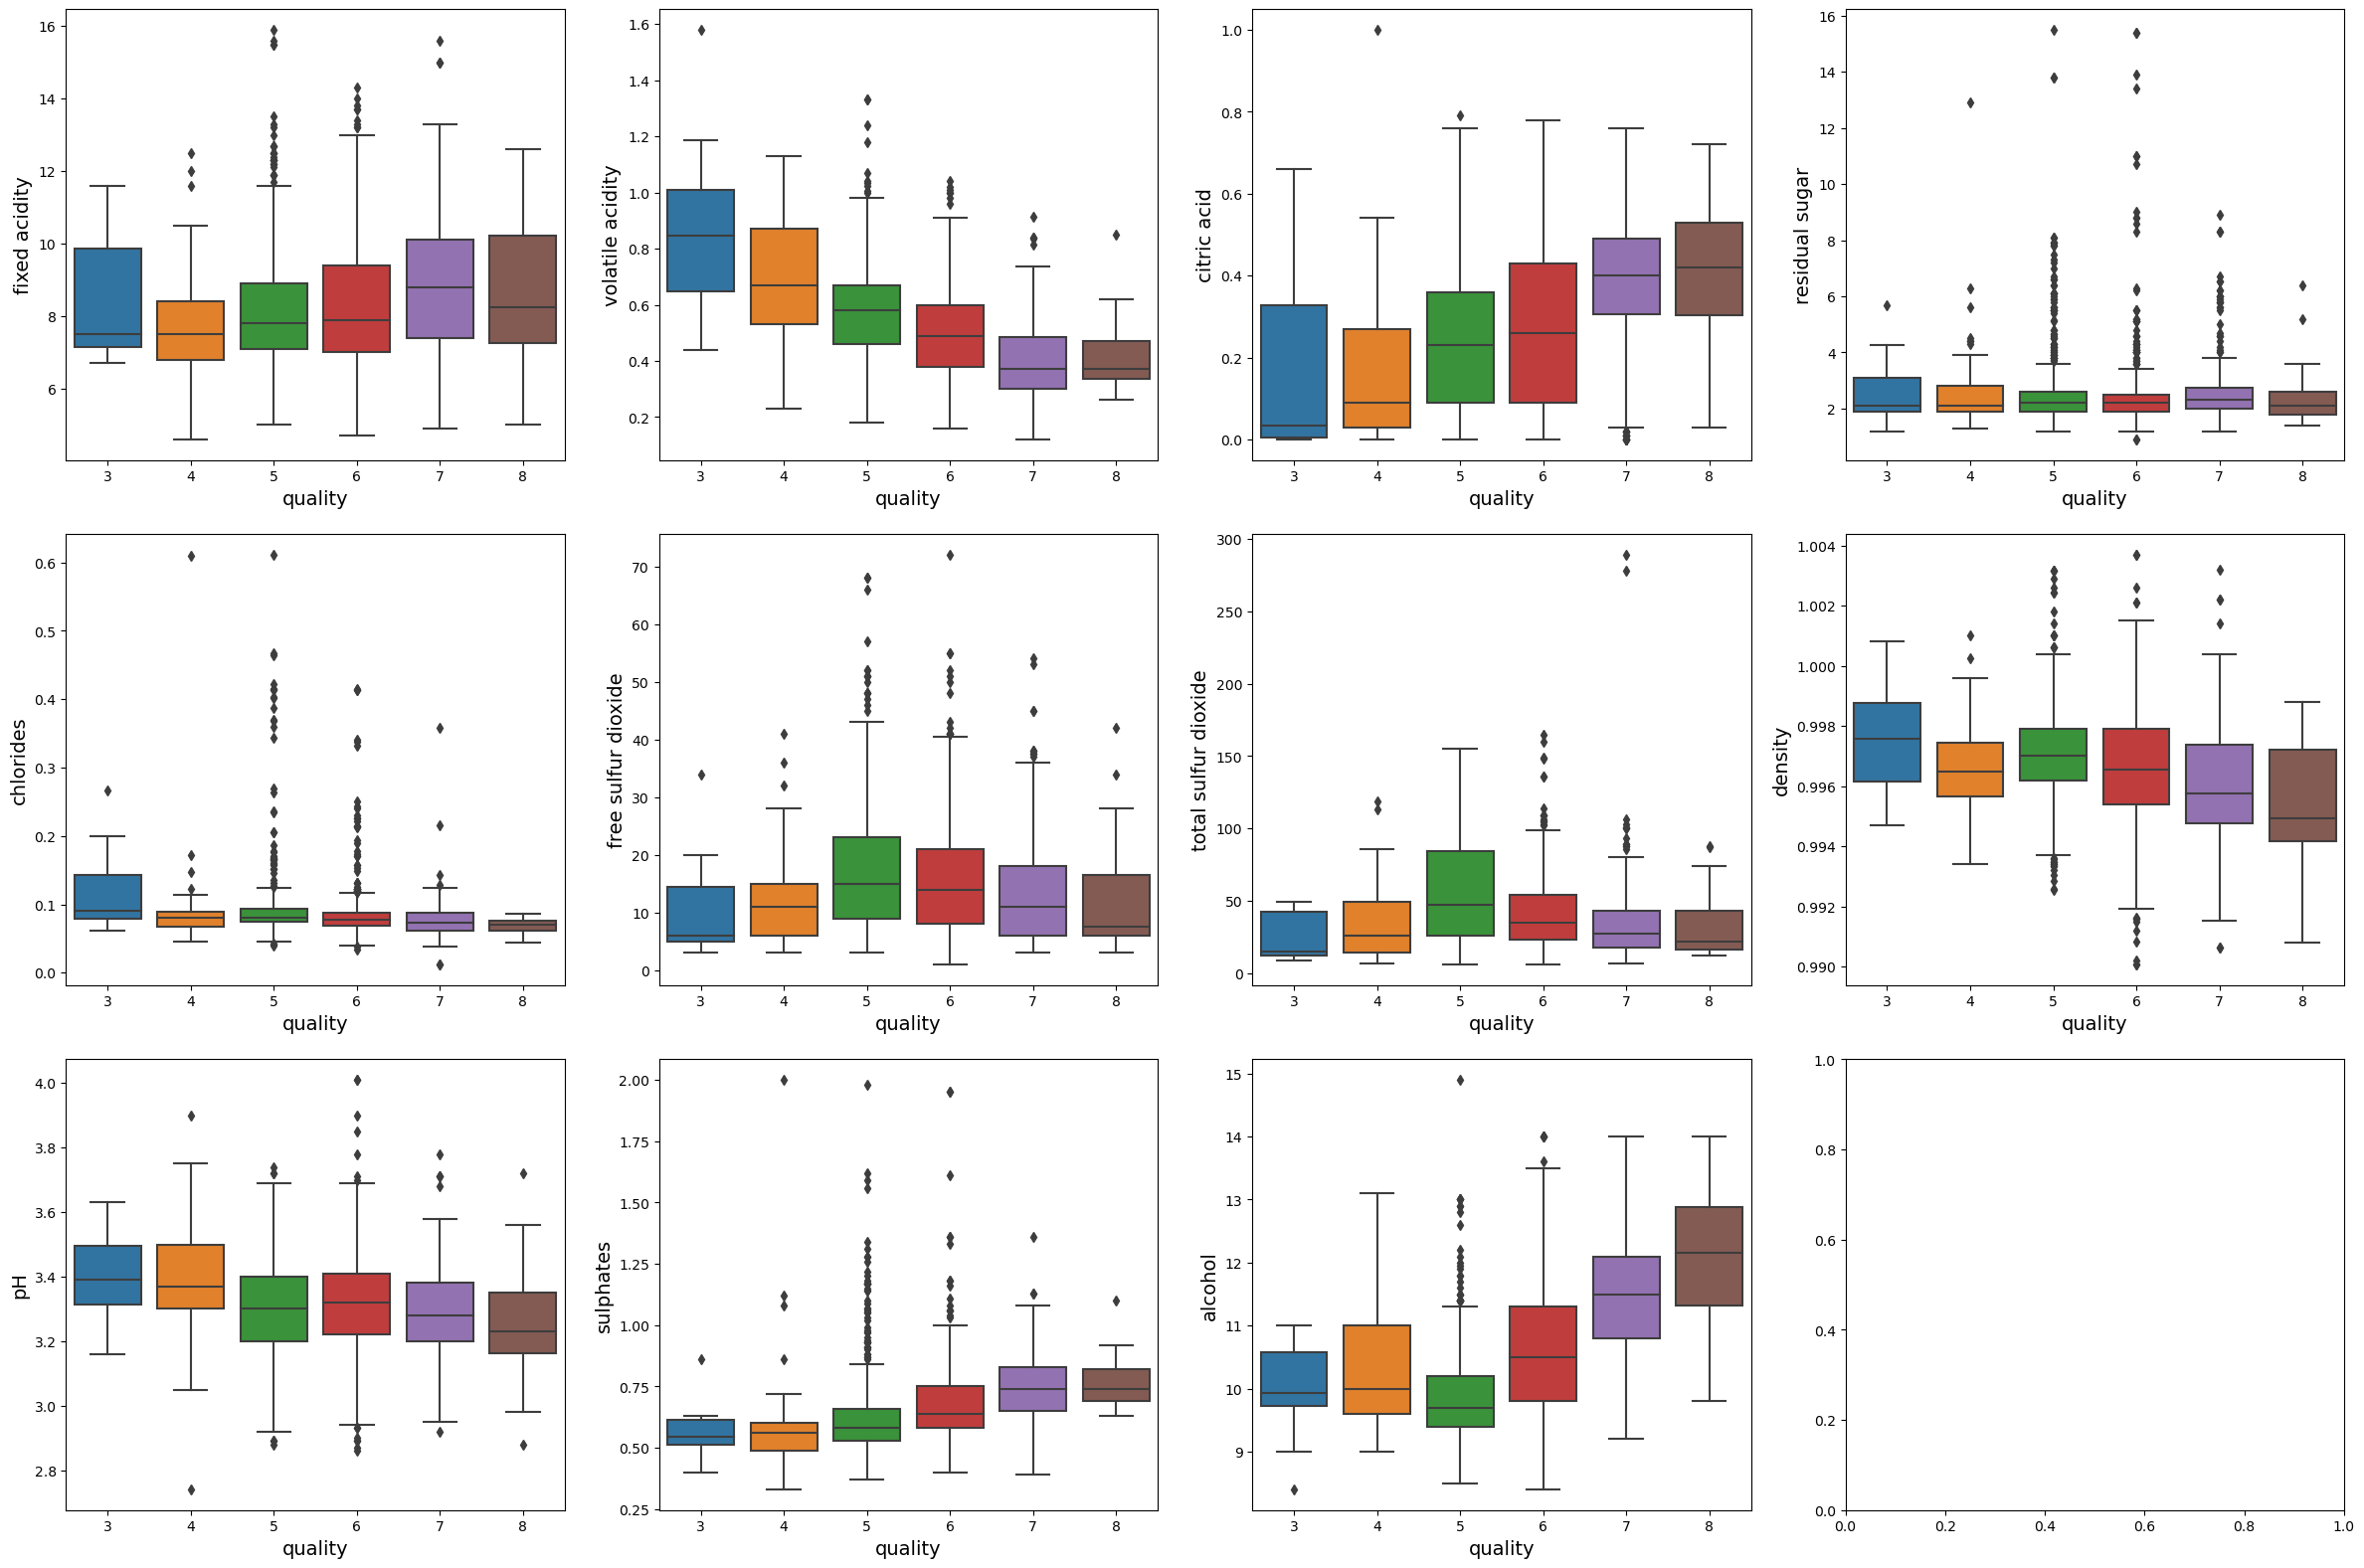

In [198]:
fig, axes = plt.subplots(3, 4, figsize=(24, 16)) 
axes = axes.flatten()
for i in range(0, len(X.columns)):
    sns.boxplot(x='quality', y=X.iloc[:, i], data=df, ax=axes[i])
save_fig("boxplots", tight_layout=False, fig_extension="png", resolution=300)
plt.tight_layout()
plt.show()

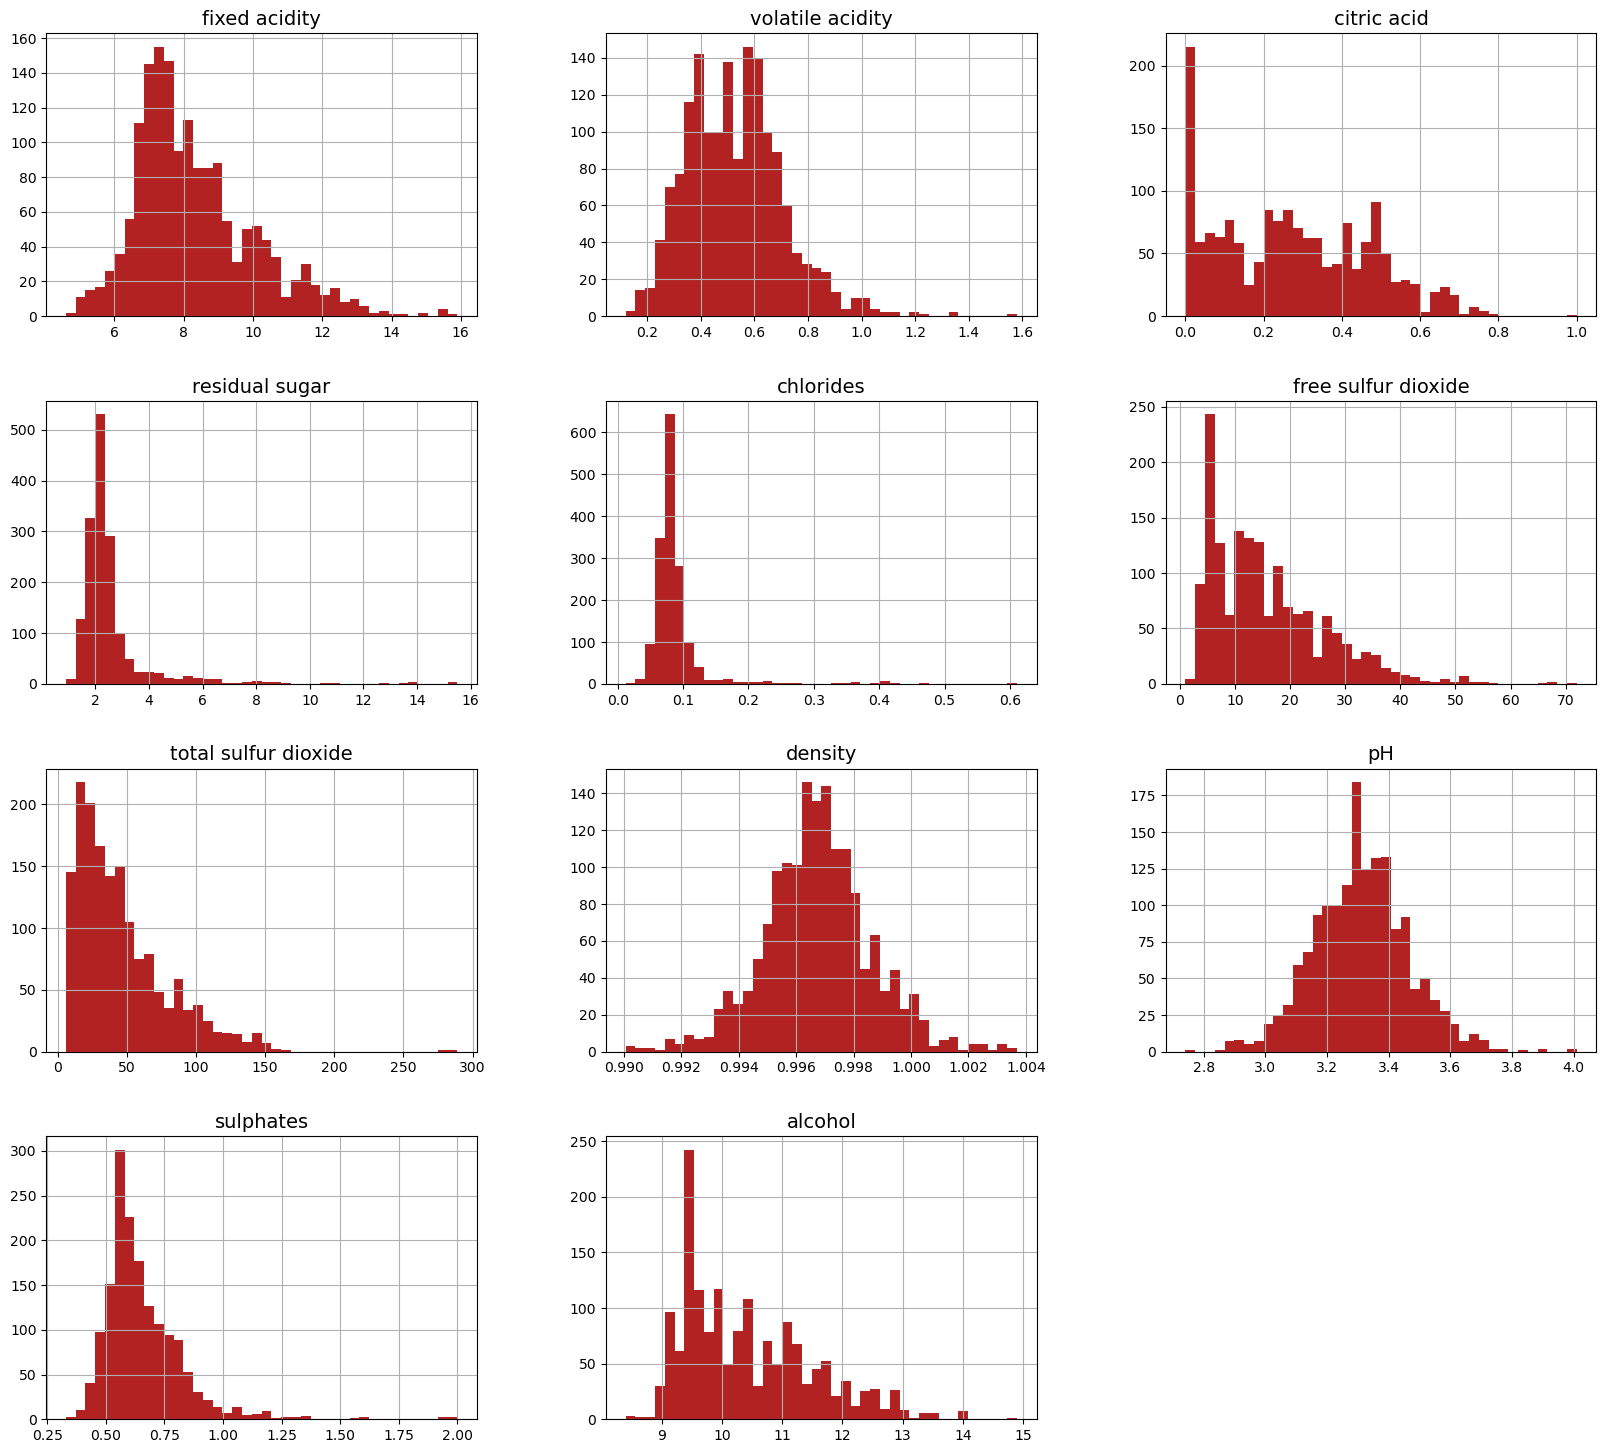

In [199]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X.hist(bins = 40,figsize=(20, 18), color = 'firebrick')
save_fig("histograms", tight_layout=False, fig_extension="png", resolution=300)
plt.show()

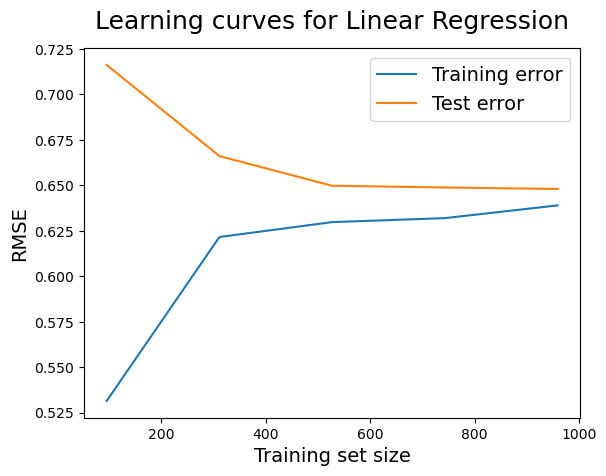

In [177]:
train_sizes, train_scores, test_scores = learning_curve(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error', random_state=123)
train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
test_scores_mean = np.sqrt(-test_scores.mean(axis=1))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Test error')
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for Linear Regression', fontsize=18, y=1.03)
plt.legend()

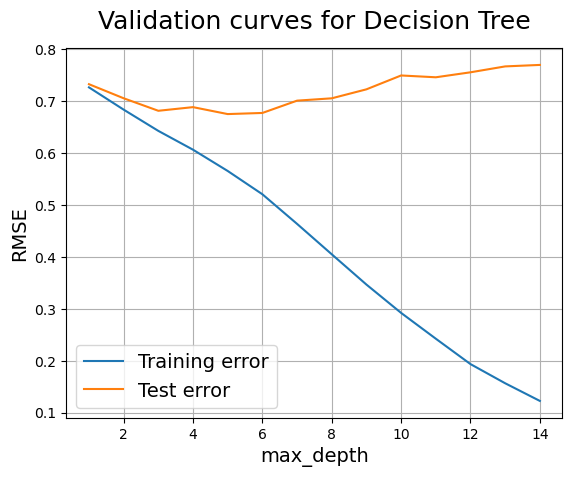

In [178]:
param_range = np.arange(1, 15, 1)
train_scores, test_scores = validation_curve(tree, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5, scoring="neg_mean_squared_error")
train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
test_scores_mean = np.sqrt(-test_scores.mean(axis=1))
plt.plot(param_range, train_scores_mean, label='Training error')
plt.plot(param_range, test_scores_mean, label='Test error')
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('max_depth', fontsize=14)
plt.title('Validation curves for Decision Tree', fontsize=18, y=1.03)
plt.legend()
plt.grid()

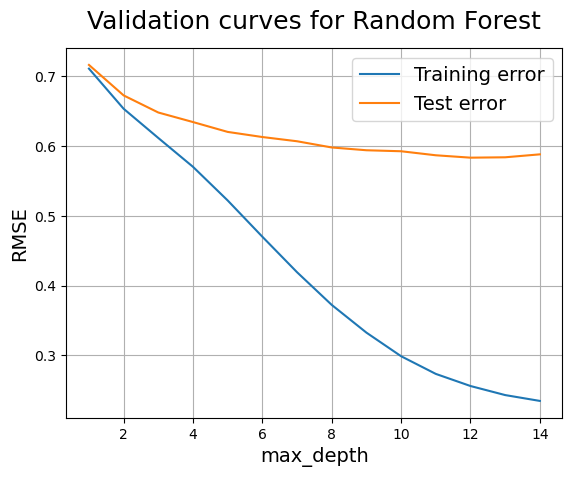

In [179]:
param_range = np.arange(1, 15, 1)
train_scores, test_scores = validation_curve(forest, X_train, y_train, param_name="max_depth", param_range=param_range, cv=5, scoring="neg_mean_squared_error")
train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
test_scores_mean = np.sqrt(-test_scores.mean(axis=1))
plt.plot(param_range, train_scores_mean, label='Training error')
plt.plot(param_range, test_scores_mean, label='Test error')
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('max_depth', fontsize=14)
plt.title('Validation curves for Random Forest', fontsize=18, y=1.03)
plt.legend()
plt.grid()

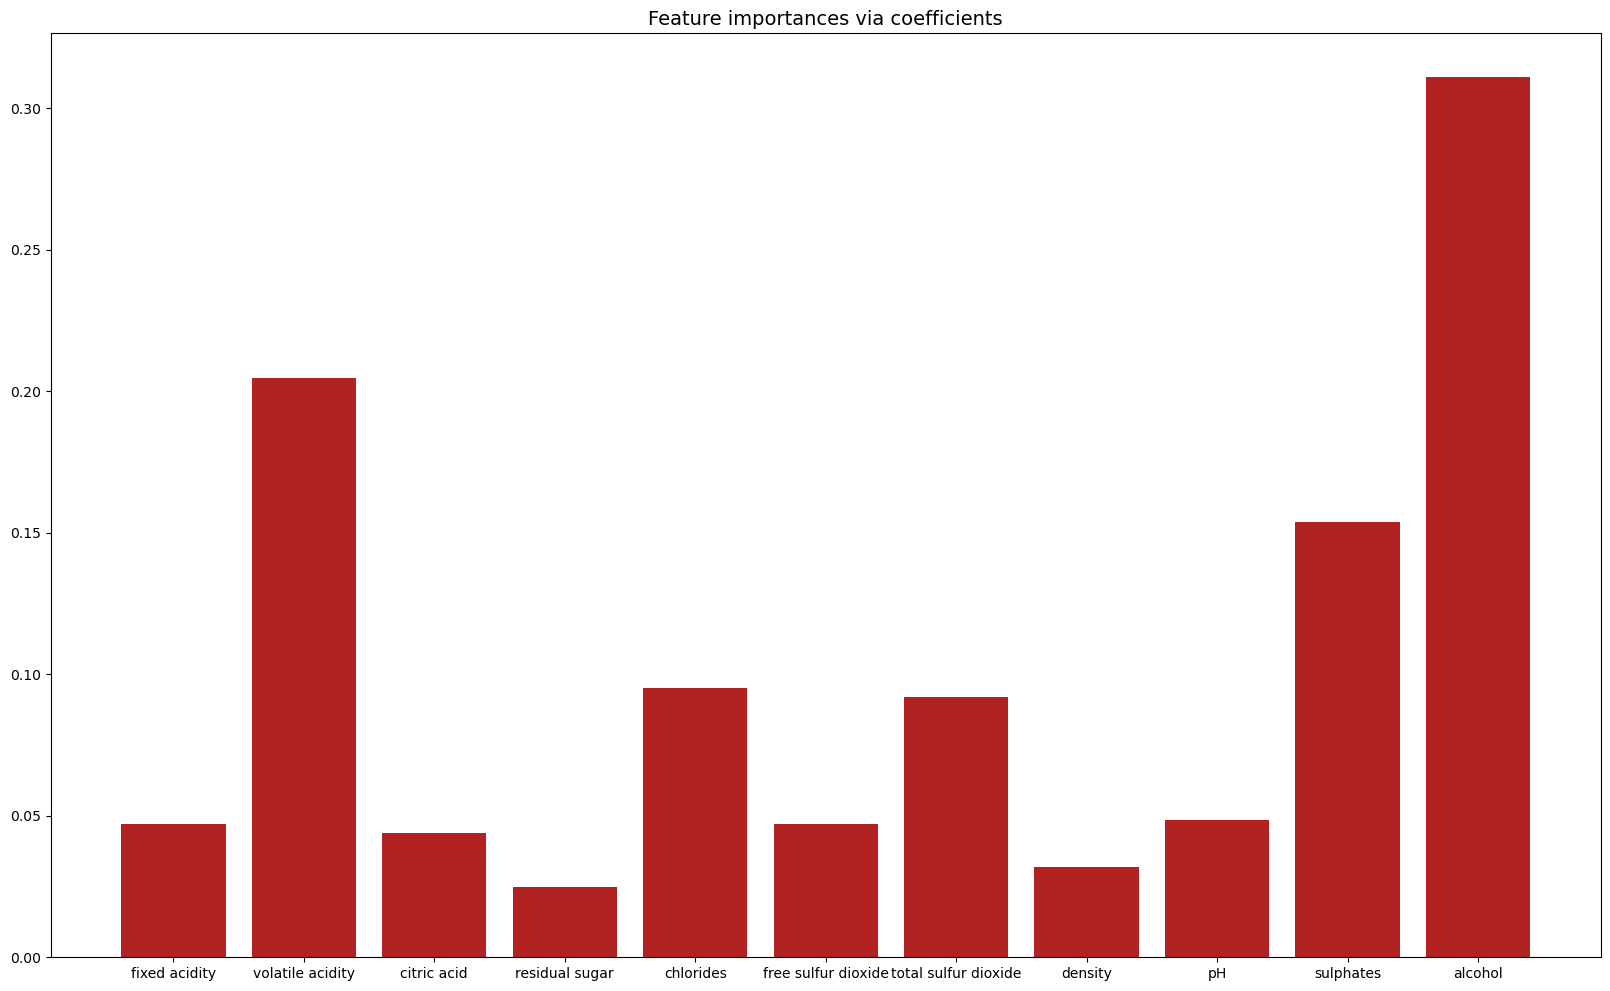

In [209]:
lasso = LassoCV().fit(X_train, y_train)
importance = np.abs(lasso.coef_)
feature_names = np.array(X.columns)
plt.figure(figsize=(20, 12))
plt.bar(height=importance, x=feature_names, color = 'firebrick')
plt.title("Feature importances via coefficients")
save_fig("feature_importance", tight_layout=False, fig_extension="png", resolution=300)
plt.show()

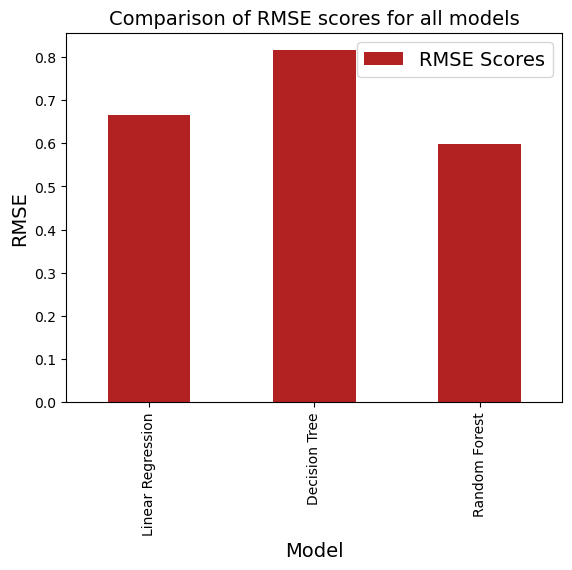

In [203]:
#Comparison of RMSE scores for all models on a bar chart
rmse_scores_all = [rmse_test, tree_rmse, forest_rmse]
rmse_scores_all = np.array(rmse_scores_all)
rmse_scores_all = rmse_scores_all.reshape(-1, 1)
rmse_scores_all = pd.DataFrame(rmse_scores_all, columns=['RMSE Scores'])
rmse_scores_all['Model'] = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_scores_all = rmse_scores_all.set_index('Model')
rmse_scores_all.plot(kind='bar', color = 'firebrick')
save_fig("RMSE_scores", tight_layout=False, fig_extension="png", resolution=300)
plt.title('Comparison of RMSE scores for all models')
plt.ylabel('RMSE')
plt.show()


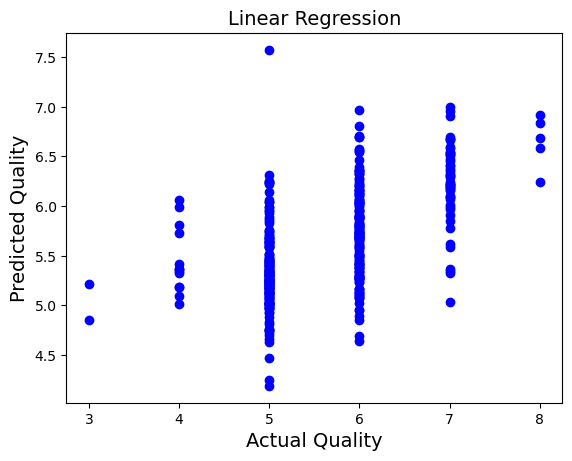

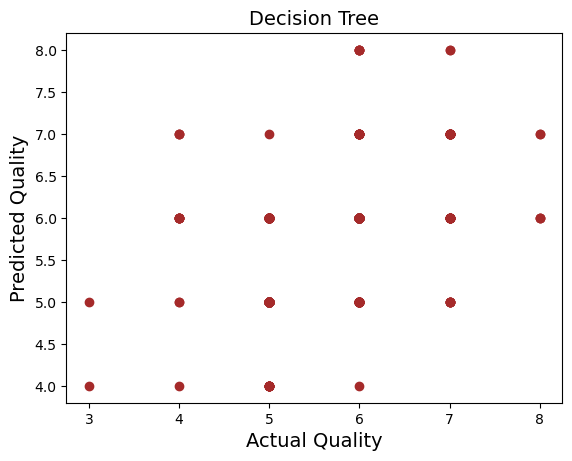

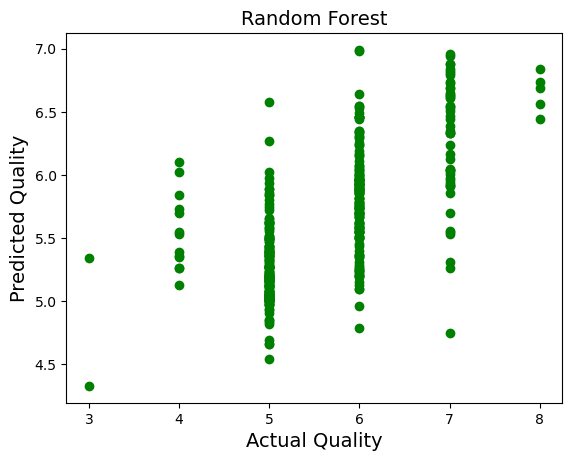

In [205]:
#Comparison of how well the models predict the quality of the wine spread out on a scatter plot
plt.scatter(y_test, lin_pred, color = 'blue')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Linear Regression')
save_fig("LR_scatter", tight_layout=False, fig_extension="png", resolution=300)
plt.show()

plt.scatter(y_test, tree_test_pred, color = 'brown')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Decision Tree')
save_fig("DT_scatter", tight_layout=False, fig_extension="png", resolution=300)
plt.show()

plt.scatter(y_test, forest_pred, color = 'green')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Random Forest')
save_fig("RF_scatter", tight_layout=False, fig_extension="png", resolution=300)
plt.show()

--- 0.0233309268951416 seconds ---
--- 0.03578805923461914 seconds ---
--- 0.7400369644165039 seconds ---


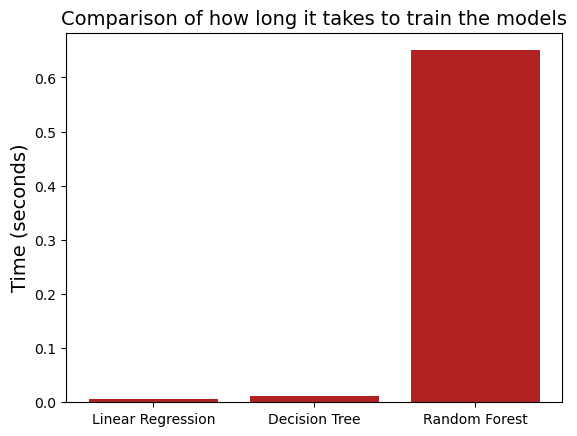

In [206]:
#comparison of how long it takes to train the models
import time 
start_time = time.time()
reg = LinearRegression()
reg.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

#Plot of how long it takes to train the models
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.bar(x=['Linear Regression', 'Decision Tree', 'Random Forest'], height=[0.006, 0.012, 0.65], color = 'firebrick')
plt.title('Comparison of how long it takes to train the models')
plt.ylabel('Time (seconds)')
save_fig("time", tight_layout=False, fig_extension="png", resolution=300)
plt.show()



--- 0.0006279945373535156 seconds ---
--- 0.0005800724029541016 seconds ---
--- 0.01568889617919922 seconds ---


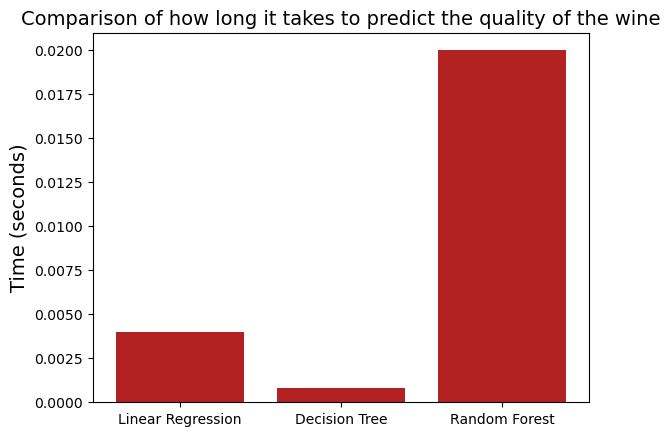

In [184]:
start_time = time.time()
reg_pred = reg.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
tree_pred = tree.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
forest_pred = forest.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

#Plot of how long it takes to predict the quality of the wine
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.bar(x=['Linear Regression', 'Decision Tree', 'Random Forest'], height=[0.004, 0.0008, 0.020], color = 'firebrick')
plt.title('Comparison of how long it takes to predict the quality of the wine')
plt.ylabel('Time (seconds)')
plt.show()

## Discussion and Conclusion

### What I learned from my results:
- The best model for predicting the quality of the wine is the Random Forest model.
- The best model for predicting the quality of the wine with the least amount of time is the Decision Tree model.
- The Linear Regression model is the worst model for predicting the quality of the wine.

### Obstacles I faced:
- I had trouble with the learning curve and validation curve graphs. The graphs looked wrong and I was not sure how to fix them. The information needed did not show up.
- I struggled with trying to incorporate the feature importance graphs into the code. And the important features in general, besides finding out what they were.
- Went on lots of different tangents while not being able to stay focused on the main goal of the project.

### What I would do differently:
- I would try to understand the parameters better, the parameter selection seems to be the most important part of the project.
- Need to incorporate more feature importance into parts of the project and see how much it affects the results.
- Would go back and select the features that for the model training and testing.
- I would try to understand the cross-validation better.


### Quantitative Analysis
- Alcohol is the most important feature in determining the quality of the wine. It is nearly 40% of the importance of the quality of the wine. Volatile acidity and the sulphates make up the next 35% of the wine quality, so if you don't want to change your alcohol level, these are the things you'd want to change next for the quality. 

- Random Forest works about 20% better than Decision Tree and 10% better than Linear Regression. 

- While volatile acidity is an important feature, it has a 50% correlation with citric acid, which seems to not be an important feature but it affects one of the more important features in wine quality.





### References

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.